In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
%cd "C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\genpact hackathon"

C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\genpact hackathon


In [3]:
india_soil_railfall_30years = pd.read_csv('India_soil_rainfall_30years.csv')

In [4]:
india_test = pd.read_csv('India_test.csv')

In [5]:
india_train = pd.read_csv('India_train.csv')

In [6]:
submission = pd.read_csv('submission.csv')

In [7]:
usa_commodity_price = pd.read_csv('USA_Commodity_prices.csv')

In [8]:
usa_test = pd.read_csv('USA_test.csv')

In [9]:
usa_train = pd.read_csv('USA_train.csv')

In [10]:
usa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    object 
 3   Harvested (1000 Acres)                            540 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    float64
 9   Minimum Temperature V

In [11]:
usa_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              400 non-null    int64  
 1   State                                             380 non-null    object 
 2   Planted (1000 Acres)                              386 non-null    object 
 3   Harvested (1000 Acres)                            385 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    400 non-null    int64  
 5   Average Temperature Value                         366 non-null    float64
 6   Average Temperature Anomaly                       379 non-null    float64
 7   Maximum Temperature Value                         368 non-null    float64
 8   Maximum Temperature Anomaly                       379 non-null    float64
 9   Minimum Temperature V

In [12]:
usa_train.isnull().sum()

Year                                                 0
State                                               32
Planted (1000 Acres)                                23
Harvested (1000 Acres)                              20
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           28
Average Temperature Anomaly                         31
Maximum Temperature Value                           22
Maximum Temperature Anomaly                         33
Minimum Temperature Value                           27
Minimum Temperature Anomaly                         26
Precipitation Value                                 27
Precipitation Anomaly                               21
Cooling Degree Days Value                           27
Cooling Degree Days Anomaly                         20
Heating Degree Days Value                           25
Heating Degree Days Anomaly                         30
Palmer Drought Severity Index (PDSI) Value          26
Palmer Dro

In [13]:
usa_test.isnull().sum()

Year                                                 0
State                                               20
Planted (1000 Acres)                                14
Harvested (1000 Acres)                              15
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           34
Average Temperature Anomaly                         21
Maximum Temperature Value                           32
Maximum Temperature Anomaly                         21
Minimum Temperature Value                           16
Minimum Temperature Anomaly                         24
Precipitation Value                                 16
Precipitation Anomaly                               23
Cooling Degree Days Value                           16
Cooling Degree Days Anomaly                         18
Heating Degree Days Value                           31
Heating Degree Days Anomaly                         19
Palmer Drought Severity Index (PDSI) Value          23
Palmer Dro

In [14]:
# Combining train and test data to do missing value imputation

In [15]:
usa_test['Yield (Pounds/ Harvested Area)'] = 'Test'

In [16]:
usa_combine = pd.concat([usa_train,usa_test])

In [17]:
usa_combine.shape

(960, 25)

In [18]:
usa_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              960 non-null    int64  
 1   State                                             908 non-null    object 
 2   Planted (1000 Acres)                              923 non-null    object 
 3   Harvested (1000 Acres)                            925 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    960 non-null    object 
 5   Average Temperature Value                         898 non-null    float64
 6   Average Temperature Anomaly                       908 non-null    float64
 7   Maximum Temperature Value                         906 non-null    float64
 8   Maximum Temperature Anomaly                       906 non-null    float64
 9   Minimum Temperature V

In [19]:
usa_combine.isnull().sum()

Year                                                 0
State                                               52
Planted (1000 Acres)                                37
Harvested (1000 Acres)                              35
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           62
Average Temperature Anomaly                         52
Maximum Temperature Value                           54
Maximum Temperature Anomaly                         54
Minimum Temperature Value                           43
Minimum Temperature Anomaly                         50
Precipitation Value                                 43
Precipitation Anomaly                               44
Cooling Degree Days Value                           43
Cooling Degree Days Anomaly                         38
Heating Degree Days Value                           56
Heating Degree Days Anomaly                         49
Palmer Drought Severity Index (PDSI) Value          49
Palmer Dro

In [20]:
usa_combine1 = usa_combine # creating a duplicate for later

In [21]:
usa_combine = usa_combine.drop('Yield (Pounds/ Harvested Area)',axis=1)

In [22]:
usa_combine.head(10)

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,NaN,268,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,NaN,-0.383333,72.700000,-0.466667,46.825000,1.691667,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
5,1975,GA,165,160,65.716667,0.841667,NaN,1.650000,54.358333,1.058333,...,234.083333,-4.083333,6.935833,5.252500,6.935833,7.194167,3.911667,7.223333,NaN,4.378333
6,1975,IL,0,0,52.983333,3.733333,63.750000,NaN,46.225000,3.116667,...,525.000000,6.166667,3.544167,1.652500,3.165833,4.084167,2.876667,2.972500,1.561667,1.236667
7,1975,KS,0,0,55.725000,NaN,69.225000,2.925000,45.208333,0.958333,...,437.583333,19.750000,2.863333,2.080833,2.417500,1.554167,2.158333,1.339167,2.283333,2.047500
8,1975,KY,1,1,58.775000,3.891667,68.383333,2.541667,49.150000,3.208333,...,377.166667,0.583333,6.468333,5.627500,5.468333,3.462500,5.199167,3.362500,NaN,2.799167
9,1975,LA,320,310,70.083333,1.375000,80.566667,0.333333,NaN,0.416667,...,142.250000,-2.750000,5.825000,6.616667,5.475833,5.052500,5.298333,6.026667,2.066667,2.917500


In [23]:
usa_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              960 non-null    int64  
 1   State                                             908 non-null    object 
 2   Planted (1000 Acres)                              923 non-null    object 
 3   Harvested (1000 Acres)                            925 non-null    object 
 4   Average Temperature Value                         898 non-null    float64
 5   Average Temperature Anomaly                       908 non-null    float64
 6   Maximum Temperature Value                         906 non-null    float64
 7   Maximum Temperature Anomaly                       906 non-null    float64
 8   Minimum Temperature Value                         917 non-null    float64
 9   Minimum Temperature A

In [24]:
usa_combine['Planted (1000 Acres)']=usa_combine['Planted (1000 Acres)'].str.replace(',','')

In [25]:
usa_combine['Harvested (1000 Acres)'] = usa_combine['Harvested (1000 Acres)'].str.replace(',','')

In [26]:
usa_combine['Planted (1000 Acres)'] = usa_combine['Planted (1000 Acres)'].astype('float')

In [27]:
usa_combine['Harvested (1000 Acres)'] = usa_combine['Harvested (1000 Acres)'].astype('float')

In [28]:
numcols = usa_combine.select_dtypes(include=np.number)

In [29]:
catcols  = usa_combine.drop(numcols.columns,axis=1)

In [30]:
# Using Mice to Impute Date

In [31]:
original = numcols

In [32]:
mask = numcols.isnull()

In [33]:
numcols = numcols.where(~mask,original)

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [35]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(),initial_strategy='median',max_iter=20)

In [36]:
numcols_imp = imputer.fit_transform(numcols)

C:\Users\ykkou\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [37]:
numcols_imp = pd.DataFrame(numcols_imp,columns=numcols.columns)

In [38]:
numcols_imp.isnull().sum()

Year                                                0
Planted (1000 Acres)                                0
Harvested (1000 Acres)                              0
Average Temperature Value                           0
Average Temperature Anomaly                         0
Maximum Temperature Value                           0
Maximum Temperature Anomaly                         0
Minimum Temperature Value                           0
Minimum Temperature Anomaly                         0
Precipitation Value                                 0
Precipitation Anomaly                               0
Cooling Degree Days Value                           0
Cooling Degree Days Anomaly                         0
Heating Degree Days Value                           0
Heating Degree Days Anomaly                         0
Palmer Drought Severity Index (PDSI) Value          0
Palmer Drought Severity Index (PDSI) Anomaly        0
Palmer Hydrological Drought Index (PHDI) Value      0
Palmer Hydrological Drought 

In [39]:
numcols_imp

,Year,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975.0,385.0,370.0,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,7.230000,...,224.916667,-1.083333,8.161667,6.840833,6.280833,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975.0,700.0,680.0,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,9.298333,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975.0,305.0,268.0,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,4.846667,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975.0,900.0,875.0,58.516667,-0.383333,72.700000,-0.466667,46.825000,1.691667,5.745000,...,303.083333,43.416667,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975.0,4.0,4.0,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,8.595833,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022.0,660.0,310.0,62.900000,5.191667,78.133333,5.116667,48.683333,2.766667,3.464167,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
956,2022.0,270.0,265.0,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,5.785000,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
957,2022.0,335.0,325.0,61.516667,3.475000,70.900000,1.800000,48.091667,2.191667,6.569167,...,298.000000,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
958,2022.0,7900.0,2500.0,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,4.769167,...,164.916667,5.666667,-0.050833,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [40]:
catcols.reset_index(inplace=True)

In [41]:
catcols.drop('index',axis=1,inplace = True)

In [42]:
catcols.State.value_counts(dropna=False)

NaN    52
OK     48
MS     48
MO     47
AZ     47
TN     47
GA     47
LA     46
VA     46
AL     46
KY     45
NM     45
FL     45
AR     45
KS     44
NC     44
NV     44
SC     44
CA     44
IL     43
TX     43
Name: State, dtype: int64

In [43]:
# Since imputing the most frequent value in place of NaN will create a bias. We are going to impute the phrase 'Not available'

In [44]:
catcols.State = catcols.State.fillna('Not Available')

In [45]:
combinedf_imp = pd.concat([numcols_imp,catcols],axis=1)

In [46]:
usa_combine1.reset_index(inplace=True)

In [47]:
usa_combine1.drop('index',axis=1,inplace=True)

In [48]:
combinedf_imp['Yield (Pounds/ Harvested Area)'] = usa_combine1['Yield (Pounds/ Harvested Area)']

In [49]:
combinedf_imp

,Year,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,State,Yield (Pounds/ Harvested Area)
0,1975.0,385.0,370.0,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,7.230000,...,8.161667,6.840833,6.280833,4.684167,6.132500,5.821667,4.857500,2.718333,AL,406
1,1975.0,700.0,680.0,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,9.298333,...,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500,Not Available,486
2,1975.0,305.0,268.0,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,4.846667,...,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333,AZ,1028
3,1975.0,900.0,875.0,58.516667,-0.383333,72.700000,-0.466667,46.825000,1.691667,5.745000,...,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500,CA,1074
4,1975.0,4.0,4.0,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,8.595833,...,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833,FL,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022.0,660.0,310.0,62.900000,5.191667,78.133333,5.116667,48.683333,2.766667,3.464167,...,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167,OK,Test
956,2022.0,270.0,265.0,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,5.785000,...,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000,SC,Test
957,2022.0,335.0,325.0,61.516667,3.475000,70.900000,1.800000,48.091667,2.191667,6.569167,...,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333,TN,Test
958,2022.0,7900.0,2500.0,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,4.769167,...,-0.050833,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833,TX,Test


In [50]:
# Seperating Test and Train Data

In [51]:
usa_imp_train = combinedf_imp[combinedf_imp['Yield (Pounds/ Harvested Area)'] != 'Test']

In [52]:
usa_imp_test = combinedf_imp[combinedf_imp['Yield (Pounds/ Harvested Area)'] == 'Test']

In [53]:
usa_imp_train

,Year,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,State,Yield (Pounds/ Harvested Area)
0,1975.0,385.0,370.0,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,7.230000,...,8.161667,6.840833,6.280833,4.684167,6.132500,5.821667,4.857500,2.718333,AL,406
1,1975.0,700.0,680.0,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,9.298333,...,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500,Not Available,486
2,1975.0,305.0,268.0,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,4.846667,...,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333,AZ,1028
3,1975.0,900.0,875.0,58.516667,-0.383333,72.700000,-0.466667,46.825000,1.691667,5.745000,...,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500,CA,1074
4,1975.0,4.0,4.0,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,8.595833,...,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833,FL,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2002.0,200.0,180.0,60.416667,2.433333,75.133333,1.116667,50.708333,2.791667,5.143333,...,4.065000,0.377500,1.434167,1.620833,1.524167,1.631667,3.279167,4.037500,OK,560
556,2002.0,290.0,200.0,65.700000,1.683333,76.058333,2.625000,53.325000,2.741667,6.878333,...,-1.238333,0.236667,-1.291667,-0.115833,-0.941667,-0.740000,2.412500,1.468333,Not Available,316
557,2002.0,565.0,530.0,61.725000,1.683333,72.566667,4.408333,48.841667,4.941667,6.935000,...,3.680000,0.880833,2.127500,3.180000,2.747500,3.960000,4.494167,3.199167,TN,743
558,2002.0,5600.0,4500.0,67.025000,2.716667,80.941667,0.333333,57.100000,3.116667,3.554167,...,4.174167,1.235833,0.911667,1.660833,1.031667,2.886667,4.301667,3.251667,TX,541


In [54]:
usa_imp_test.drop('Yield (Pounds/ Harvested Area)',axis=1,inplace=True)

C:\Users\ykkou\AppData\Local\Temp\ipykernel_16212\2688387155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_imp_test.drop('Yield (Pounds/ Harvested Area)',axis=1,inplace=True)


In [55]:
usa_imp_test

,Year,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,State
560,2003.0,525.0,510.0,66.733333,1.475000,75.833333,1.033333,55.633333,3.933333,7.310000,...,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000,AL
561,2003.0,980.0,945.0,61.266667,3.616667,74.966667,0.366667,53.558333,1.841667,4.736667,...,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500,AR
562,2003.0,215.0,213.0,62.900000,4.275000,78.158333,4.383333,51.641667,2.208333,2.875833,...,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,0.480000,0.297500,AZ
563,2003.0,550.0,545.0,62.425000,1.775000,74.850000,1.683333,48.991667,4.858333,2.802500,...,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167,CA
564,2003.0,92.0,92.0,73.783333,3.791667,84.208333,2.533333,61.533333,2.066667,6.897500,...,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022.0,660.0,310.0,62.900000,5.191667,78.133333,5.116667,48.683333,2.766667,3.464167,...,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167,OK
956,2022.0,270.0,265.0,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,5.785000,...,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000,SC
957,2022.0,335.0,325.0,61.516667,3.475000,70.900000,1.800000,48.091667,2.191667,6.569167,...,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333,TN
958,2022.0,7900.0,2500.0,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,4.769167,...,5.666667,-0.050833,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833,TX


In [56]:
usa_imp_train['Yield (Pounds/ Harvested Area)'] = usa_imp_train['Yield (Pounds/ Harvested Area)'].astype('float') 

C:\Users\ykkou\AppData\Local\Temp\ipykernel_16212\997157090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_imp_train['Yield (Pounds/ Harvested Area)'] = usa_imp_train['Yield (Pounds/ Harvested Area)'].astype('float')


In [57]:
# EDA

<Axes: xlabel='Year', ylabel='Yield (Pounds/ Harvested Area)'>

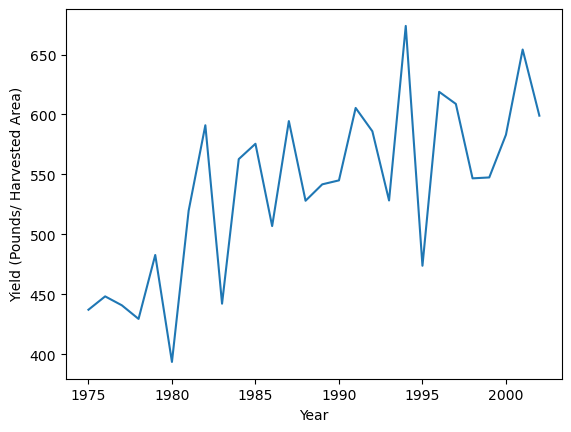

In [58]:
sns.lineplot(data=usa_imp_train,x='Year',y='Yield (Pounds/ Harvested Area)',errorbar=None)

<Axes: >

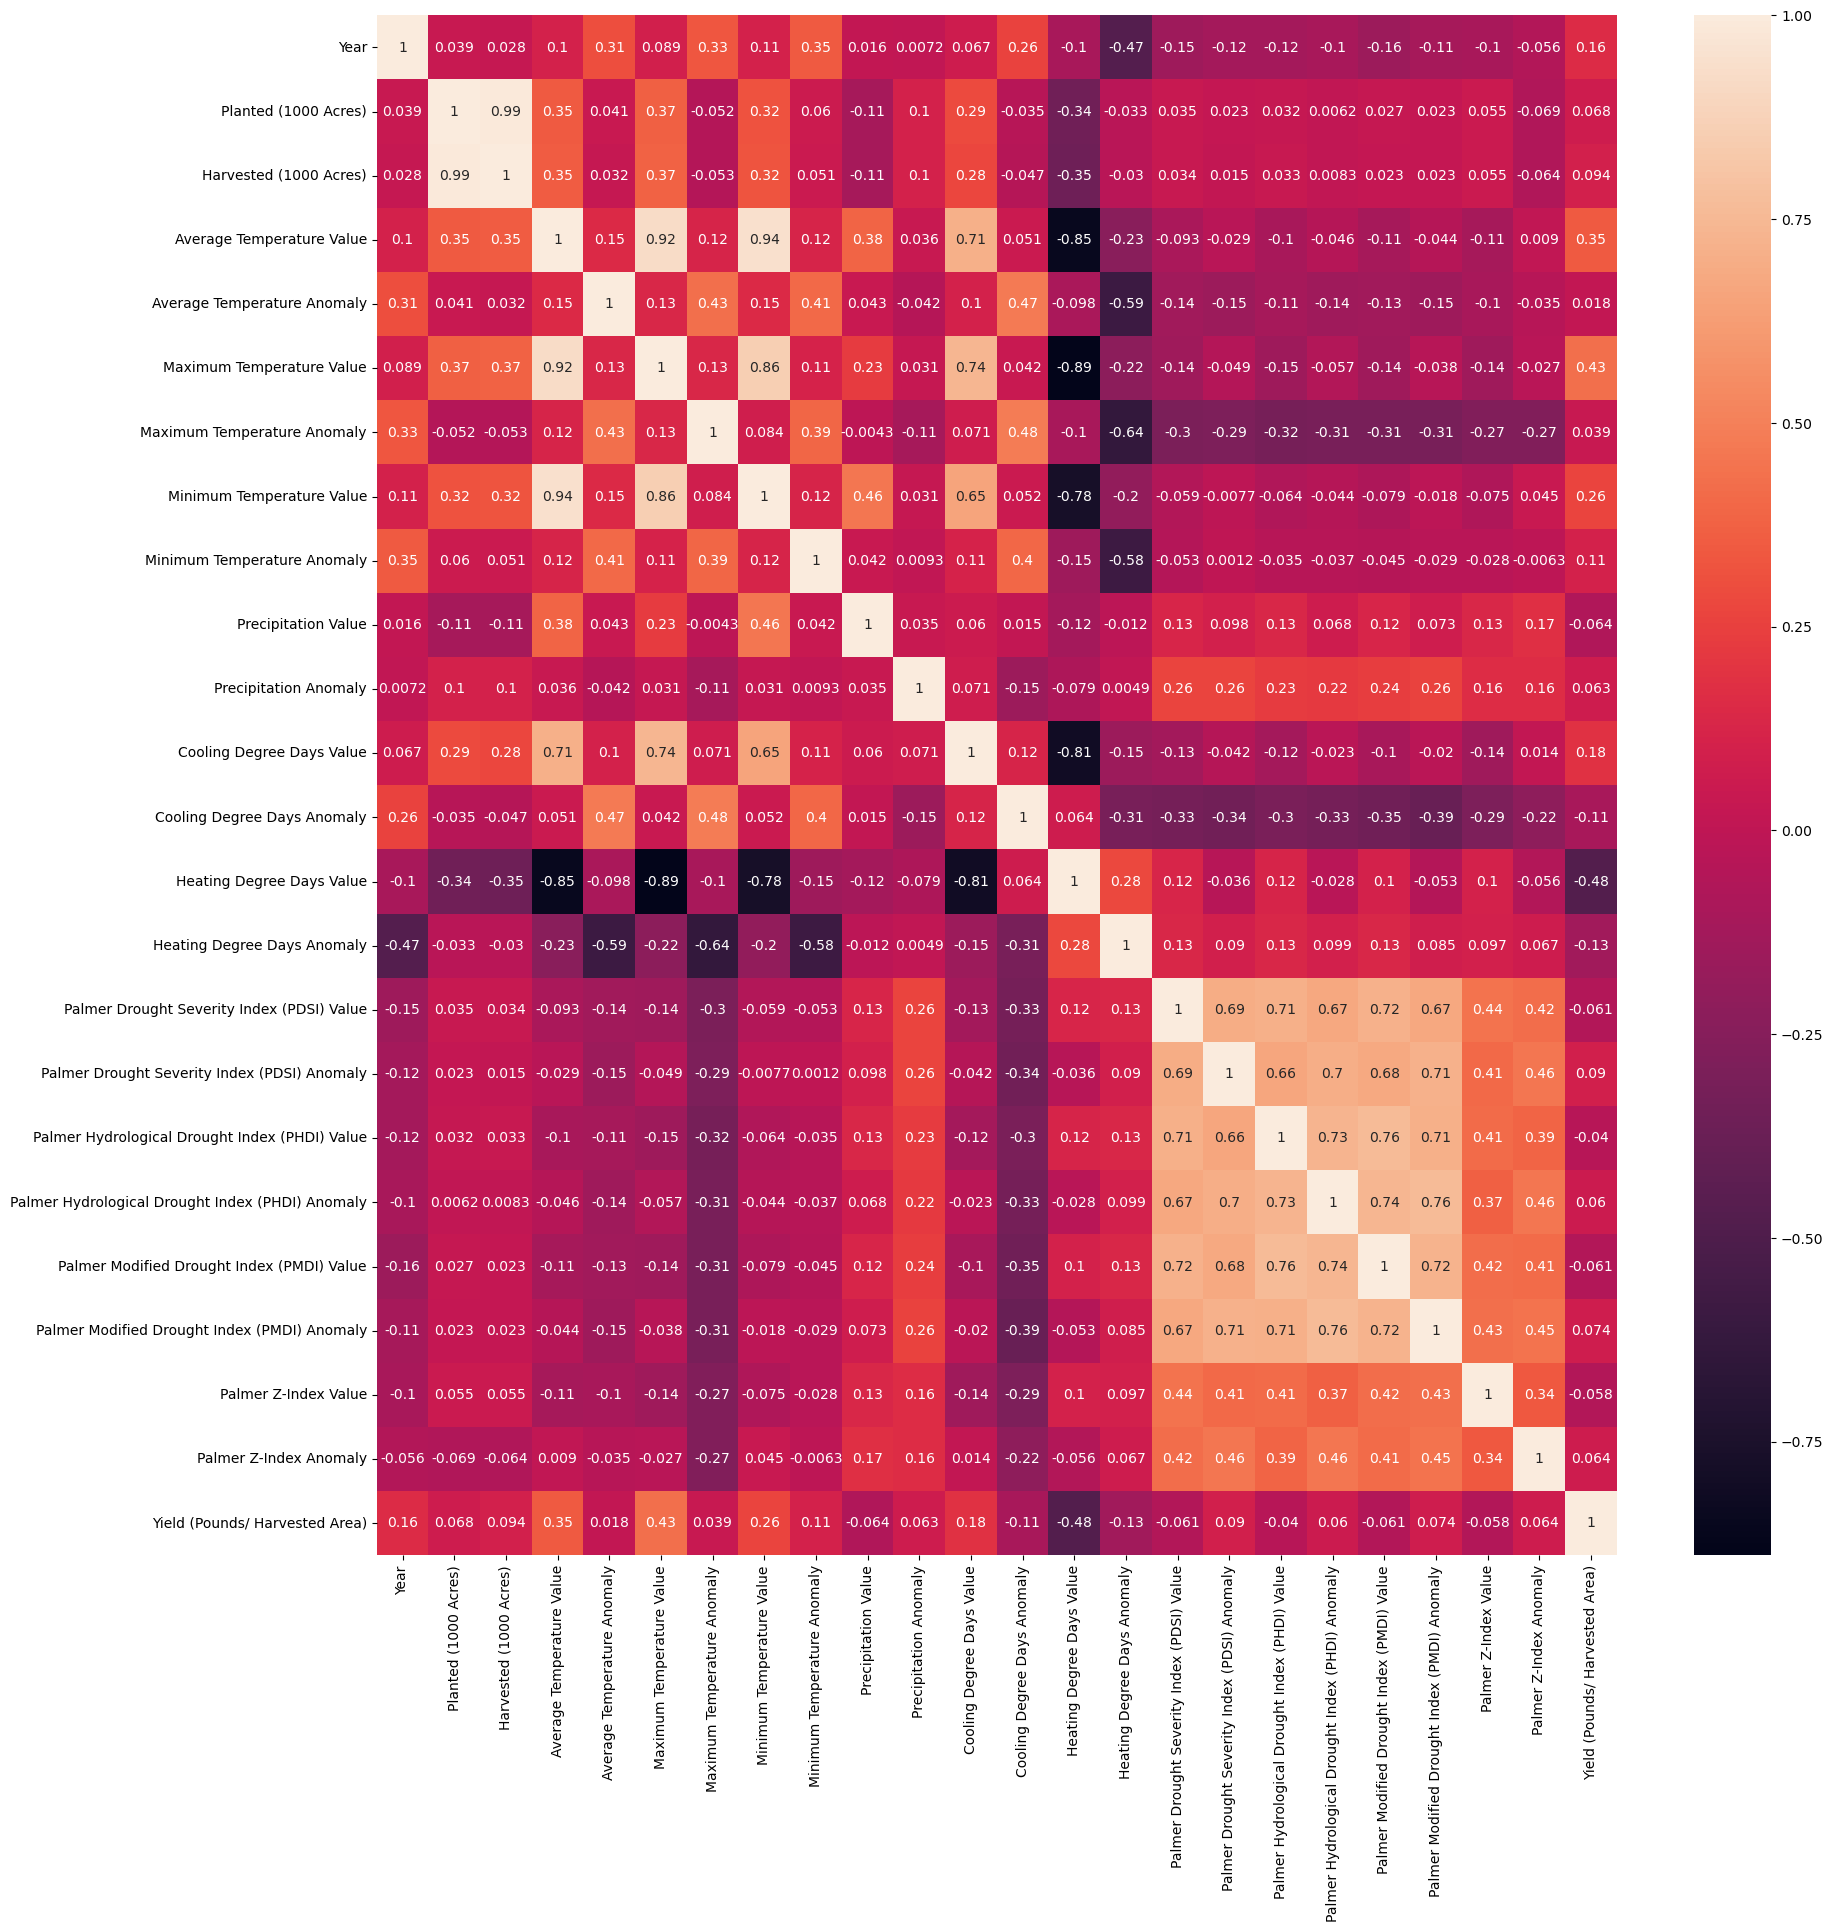

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(usa_imp_train.corr(numeric_only=True),annot=True)

<Axes: >

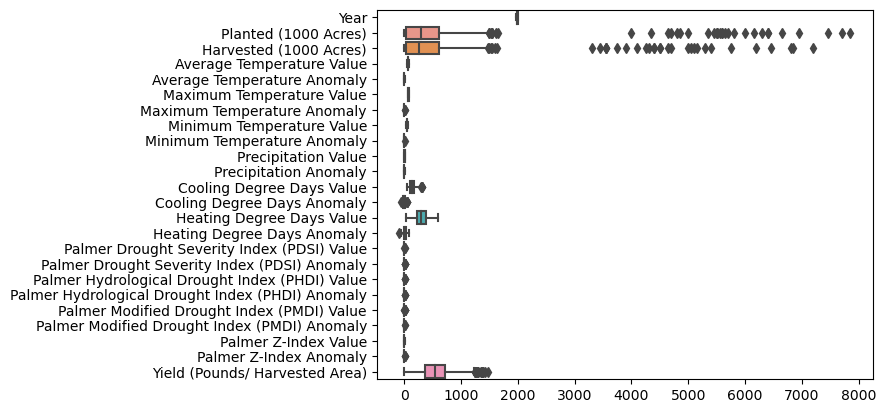

In [60]:
sns.boxplot(usa_imp_train,orient='h')

In [61]:
# Data Transformation

In [62]:
X_train = usa_imp_train.drop('Yield (Pounds/ Harvested Area)',axis=1)
y_train = usa_imp_train['Yield (Pounds/ Harvested Area)']
X_test = usa_imp_test

In [63]:
X_train.shape,y_train.shape,X_test.shape

((560, 24), (560,), (400, 24))

In [64]:
X_train.State.value_counts()

Not Available    32
AZ               28
TN               28
OK               28
GA               28
MS               28
AL               27
LA               27
MO               27
KY               27
KS               27
IL               26
NM               26
FL               26
CA               26
VA               26
NC               25
NV               25
AR               25
SC               24
TX               24
Name: State, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
X_train.State = le.fit_transform(X = X_train.State)
X_train.Year = le.fit_transform(X = X_train.Year)
X_test.State = le.fit_transform(X = X_test.State)
X_test.Year = le.fit_transform(X = X_test.Year)

C:\Users\ykkou\AppData\Local\Temp\ipykernel_16212\3252036462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.State = le.fit_transform(X = X_test.State)
C:\Users\ykkou\AppData\Local\Temp\ipykernel_16212\3252036462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.Year = le.fit_transform(X = X_test.Year)


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr_model = lr.fit(X_train,y_train)

In [73]:
lr_model.score(X_train,y_train)

0.4724938903531887

In [75]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sma

In [76]:
X2  = sma.add_constant(X_train)

In [78]:
_1  = sma.OLS(y_train, X2)
_2  = _1.fit()

In [79]:
print(_2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Yield (Pounds/ Harvested Area)   R-squared:                       0.472
Model:                                        OLS   Adj. R-squared:                  0.449
Method:                             Least Squares   F-statistic:                     19.97
Date:                            Mon, 17 Jul 2023   Prob (F-statistic):           2.19e-59
Time:                                    11:48:56   Log-Likelihood:                -3848.7
No. Observations:                             560   AIC:                             7747.
Df Residuals:                                 535   BIC:                             7856.
Df Model:                                      24                                         
Covariance Type:                        nonrobust                                         
                                                       coef    std err          t      P>|

In [80]:
to_drop = ['Average Temperature Value','Average Temperature Anomaly','Maximum Temperature Anomaly','Minimum Temperature Anomaly',
          'Precipitation Anomaly','Cooling Degree Days Anomaly','Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly']

In [81]:
X_train.drop(to_drop,axis=1,inplace=True)
X_test.drop(to_drop,axis=1,inplace=True)

C:\Users\ykkou\AppData\Local\Temp\ipykernel_16212\2960423196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(to_drop,axis=1,inplace=True)


In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dt = DecisionTreeRegressor(max_depth=6)

In [84]:
dt_model = dt.fit(X_train,y_train)

In [85]:
dt_model.score(X_train,y_train)

0.9070956772022793

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
np.mean(cross_val_score(dt,X_train,y_train,cv=3))

0.7022445808978804

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=500,oob_score=True,max_depth=8)

In [90]:
rf_model =rf.fit(X_train,y_train)

In [91]:
rf_model.score(X_train,y_train)

0.9541830947836766

In [92]:
np.mean(cross_val_score(rf,X_train,y_train,cv=5))

0.8223309169778205

In [93]:
rf_pred = rf_model.predict(X_test)

In [94]:
rf_pred = pd.DataFrame(rf_pred,columns=['Yield (Pounds/ Harvested Area)'])

In [95]:
rf_pred

,Yield (Pounds/ Harvested Area)
0,470.748260
1,513.291996
2,1152.046571
3,1091.287883
4,486.086327
...,...
395,410.629701
396,529.973336
397,578.617416
398,472.472602


In [96]:
submission['Yield (Pounds/ Harvested Area)']= rf_pred['Yield (Pounds/ Harvested Area)']

In [99]:
submission.to_csv('v1.csv',index=False)